In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

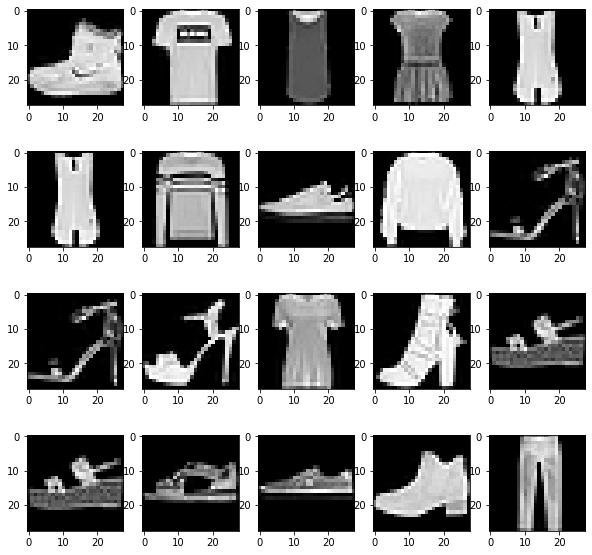

In [6]:
fig,ax = plt.subplots(4,5,figsize = (10,10))
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(x_train[i*4+j],cmap='gray')
        
# 이미지가 꽉 차 있다. -> 위치를 미리 정해놓은 데이터(전처리 된 것)
# CNN 안써도 성능이 어느 정도 나올 것임.

In [21]:
# x_train1 = x_train/128.-1
x_train1 = x_train/255.

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation = 'relu'), # 중간에 있는건 activation해야
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

# 소문자는 함수다.
# 중간에 dense -> 원래 데이터를(차원) 변형시켜서 선형으로 분리하도록



https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

In [9]:
tf.keras.activations.softmax is tf.nn.softmax

# 둘 다 인자가 다름, 인자 자체를 받지를 않는다.

False

In [ ]:
# from functools import partial  # 함수를 변경할 수 있음

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer='adam', metrics = ['accuracy'])
# function
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#              optimizer='adam', metrics = ['accuracy'])
# class -> instance화해서 넣어야됨.

In [20]:
model.fit(x_train1,y_train, epochs=5) # -1 ~1 

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4967 - accuracy: 0.8205
Epoch 2/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.3821 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.3487 - accuracy: 0.8715
Epoch 4/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.3258 - accuracy: 0.8802
Epoch 5/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.3091 - accuracy: 0.8862


In [24]:
model.fit(x_train1,y_train, epochs=5) # 0 ~1 

Epoch 1/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.5082 - accuracy: 0.8205
Epoch 2/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.3784 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.3430 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.3196 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.3055 - accuracy: 0.8876


In [25]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, save_img

In [38]:
save_img('a.jpg',x_train1[0].reshape(28,28,1))

In [39]:
img = load_img('a.jpg')

In [46]:
img

In [40]:
type(img)  # tensorflow는 image 내부적으로 PIL로 처리한다.

PIL.Image.Image

In [44]:
img_to_array(img)[...,0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,   0.,
          3.,   7.,   1.,   0.,   2.,   7.,   3.,   0.,   0.,   5.,   1.,
          0.,   0.,   0.,   5.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,
          7.,   0.,   6.,   1.,   6.,   0.,   1.,  15.,   0.,   0.,   0.,
         10.,   6.,   0.,   0.,  13.,   3.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          7.,   0.,   4.,   0.,   0.,  22.,   0.,   0.,  10.,   5.,   0.,
          0.,   0.,   1.,   0.,   8.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,   1.,
          3.,   2.,   3.,   0.,  25.,  71.,   5.,   0.,   8.,   0.,   0.,
          7.,   9.,  11.,   3.,   2.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
          0.,   9.,   1.,  39., 126., 130.,  76.,  40.,  16.,   0.,   0.,
         12.,   0.,   0.,   6.,   0.,  10.],
       [  0.,   0.,   0.,   0.,   0

In [45]:
img.mode

'RGB'

In [48]:
img.format

In [54]:
np.sum(model.predict(x_test/255)[0]) # softmax 합이 1이다.

1.0

In [55]:
np.argmax(model.predict(x_test/255)[0]) #9라고 예측

9

In [56]:
model.evaluate(x_test/255,y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.3494 - accuracy: 0.8734


[0.34936437010765076, 0.8733999729156494]

## one-hot encoding

In [61]:
from tensorflow.keras.utils import to_categorical # one hot encoding
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [62]:
y_train = to_categorical(y_train)
x_train1 = x_train/255

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation = 'relu'), # 중간에 있는건 activation해야
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam', metrics = ['accuracy'])
model.fit(x_train1,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 893us/step - loss: 0.5152 - accuracy: 0.8174
Epoch 2/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.3786 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.3447 - accuracy: 0.8733
Epoch 4/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.3226 - accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.3076 - accuracy: 0.8867


In [64]:
y_test = to_categorical(y_test)

In [65]:
model.evaluate(x_test/255,y_test)

313/313 [==============================] - 0s 681us/step - loss: 0.3714 - accuracy: 0.8657


[0.3713963031768799, 0.8657000064849854]

### layer vs units

**layer가 더 중요!**

#### keras-tuner : hyperparameter 찾기

### keras와 scikit 연동해서 hyperparameter 찾기
- keras로 연동하면 scikit을 gpu로 사용할 수 있다.

In [68]:
# 연동하기 위해 function형태로 만듬.

def bulid_model(optimizer = 'adam'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation = 'relu'), # 중간에 있는건 activation해야
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
    ])
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=optimizer, metrics = ['accuracy'])
    return model

In [70]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
kc = KerasClassifier(build_fn=bulid_model)
kc.fit(x_train1, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5101 - accuracy: 0.8210
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3784 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3396 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3178 - accuracy: 0.8829
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3016 - accuracy: 0.8882


In [72]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(kc, param_grid = {'optimizer' : ['adam', 'rmsprop','adadelta']})

In [74]:
grid.fit(x_train1,y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5412 - accuracy: 0.8099
Epoch 2/5
1500/1500 [==============================] - 1s 960us/step - loss: 0.3997 - accuracy: 0.8562
Epoch 3/5
1500/1500 [==============================] - 1s 988us/step - loss: 0.3582 - accuracy: 0.8693
Epoch 4/5
1500/1500 [==============================] - 1s 977us/step - loss: 0.3338 - accuracy: 0.8774
Epoch 5/5
375/375 [==============================] - 0s 644us/step - loss: 0.3309 - accuracy: 0.8813
Epoch 1/5
1500/1500 [==============================] - 1s 993us/step - loss: 0.5457 - accuracy: 0.8102
Epoch 2/5
1500/1500 [==============================] - 1s 805us/step - loss: 0.3972 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 1s 861us/step - loss: 0.3585 - accuracy: 0.8705
Epoch 4/5
1500/1500 [==============================] - 1s 768us/step - loss: 0.3323 - accuracy: 0.8780
Epoch 5/5
375/375 [==============================] - 0s 715us/step - loss: 0.

1500/1500 [==============================] - 1s 754us/step - loss: 1.8811 - accuracy: 0.3912
Epoch 5/5
375/375 [==============================] - 0s 601us/step - loss: 1.7160 - accuracy: 0.4326
Epoch 1/5
1500/1500 [==============================] - 1s 829us/step - loss: 2.2927 - accuracy: 0.1763
Epoch 2/5
1500/1500 [==============================] - 1s 773us/step - loss: 2.1617 - accuracy: 0.2792
Epoch 3/5
1500/1500 [==============================] - 1s 767us/step - loss: 2.0559 - accuracy: 0.3595
Epoch 4/5
1500/1500 [==============================] - 1s 803us/step - loss: 1.9568 - accuracy: 0.4625
Epoch 5/5
375/375 [==============================] - 0s 672us/step - loss: 1.8039 - accuracy: 0.5862
Epoch 1/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.5149 - accuracy: 0.8181
Epoch 2/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.3742 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.3413 - a

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000181AA039518>,
             param_grid={'optimizer': ['adam', 'rmsprop', 'adadelta']})

In [75]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.837817,0.589663,0.368568,0.019790,adam,{'optimizer': 'adam'},0.881250,0.866667,0.88175,0.876833,0.877667,0.876833,0.005436,1
1,7.452536,0.232173,0.354498,0.010924,rmsprop,{'optimizer': 'rmsprop'},0.872750,0.867667,0.87225,0.876667,0.870333,0.871933,0.002964,2
2,6.471349,0.082877,0.346576,0.013334,adadelta,{'optimizer': 'adadelta'},0.514417,0.515250,0.48900,0.432583,0.586167,0.507483,0.049500,3


In [76]:
grid.best_estimator_

In [77]:
grid.best_params_

{'optimizer': 'adam'}

In [78]:
grid.best_score_

0.8768333315849304

In [79]:
def bulid_model(optimizer = 'adam', node=64):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(node,activation = 'relu'), # 중간에 있는건 activation해야
    tf.keras.layers.Dense(node,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
    ])
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=optimizer, metrics = ['accuracy'])
    return model

In [83]:
kc = KerasClassifier(build_fn=bulid_model, validation_split=0.2)
grid = GridSearchCV(kc, param_grid = {'node' : [64,128,256,512]},cv=2)
grid.fit(x_train1,y_train, epochs=5)

Epoch 1/5
750/750 [==============================] - 1s 2ms/step - loss: 0.6150 - accuracy: 0.7858 - val_loss: 0.4664 - val_accuracy: 0.8342
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.8447 - val_loss: 0.4076 - val_accuracy: 0.8570
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.3936 - accuracy: 0.8612 - val_loss: 0.4044 - val_accuracy: 0.8575
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8713 - val_loss: 0.3764 - val_accuracy: 0.8618
Epoch 5/5
938/938 [==============================] - 1s 934us/step - loss: 0.3688 - accuracy: 0.8658
Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 0.6203 - accuracy: 0.7785 - val_loss: 0.4527 - val_accuracy: 0.8405
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.4341 - accuracy: 0.8444 - val_loss: 0.4083 - val_accuracy: 0.8542
Epoch 3/5
750/750 [==============================] - 

GridSearchCV(cv=2,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018143F97668>,
             param_grid={'node': [64, 128, 256, 512]})

In [82]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_node,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,5.287522,0.002520,0.862433,0.026222,64,{'node': 64},0.870800,0.860767,0.865783,0.005017,4
1,6.442260,0.134636,0.877905,0.045123,128,{'node': 128},0.866367,0.875033,0.870700,0.004333,2
2,9.058560,0.090239,0.988368,0.014765,256,{'node': 256},0.870267,0.863100,0.866683,0.003583,3
3,21.145774,1.009317,1.493793,0.094403,512,{'node': 512},0.876267,0.875233,0.875750,0.000517,1


KerasClassifier() 보면 ** sk_params

epochs를 fit말고 여기에 넣어도 똑같이 실행된다.

keras와 scikit_learn parameter를 분리해서 사용가능하다.


### 학습하고 결과를 본 뒤

- **그래프 등으로 여러가지를 확인해야 함**
- 예측이 잘 안되는 것을 모아서 작업을 해야 함!


</br>
</br>

## functional paradigm

- 복잡하게 해서 not-linear한 것도 만들 수 있다.
    - discriminent : 구분하는 것만 찾음
    - generative : 분포를 먼저 찾고 어디에 속했는지 찾기
- hierarchy한 feature 구조
- 이론적으로 합성함수, 실질적으로 vector 연산
![neural.png](neural.PNG)

</br>

---

## image deep learning

- fully connected(dense) 1차원으로 만들때
    - pixel dependency가 없어지는 문제 발생!
    - stationality : 1차원으로 변했을 때 공간의 의미가 없어짐.
    
- local한 특징을 잘 나타나게 하는 것 : **Convolution**
    - 가까운(local) 부분만 학습

</br>

- tf.keras.layers.LocallyConnected2D  # 공간 정보만 탐지, 학습되는 parameter는 줄지 않음(weight 공유X)
- 일반 Convolution : weight 공유